In [15]:
# Import libraries
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt



In [16]:
# Connection string for SQL Server
connection_string = "mssql+pyodbc://Manna/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"



In [17]:
# Create an SQLAlchemy engine
engine = create_engine(connection_string)

def test_connection(engine):
    try:
        with engine.connect() as conn:
            print("Connection successful!")
            return True
    except Exception as e:
        print(f"Connection failed: {e}")
        return False

def descriptive_summary(engine):
    if not test_connection(engine):
        return

    


In [19]:
# Fetch information about tables in the database
tables_query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"
tables = pd.read_sql(tables_query, engine)
print("Tables in the database:")
print(tables)

    


Tables in the database:
                 TABLE_NAME
0              SalesTaxRate
1          PersonCreditCard
2               PersonPhone
3            SalesTerritory
4           PhoneNumberType
..                      ...
66                 Location
67                 Password
68  SalesPersonQuotaHistory
69                   Person
70              SalesReason

[71 rows x 1 columns]


In [21]:
# Number of rows in each table
row_count_query = """
    SELECT 
        t.name AS table_name,
        SUM(p.rows) AS row_count
    FROM 
        sys.tables t
    INNER JOIN 
        sys.partitions p ON t.object_id = p.object_id
    WHERE 
        p.index_id IN (0, 1)
    GROUP BY 
        t.name
    ORDER BY 
        t.name
    """ 
row_count = pd.read_sql(row_count_query, engine)
print("\nNumber of rows in each table:")
print(row_count)

   


Number of rows in each table:
                   table_name  row_count
0                     Address      19614
1                 AddressType          6
2              AWBuildVersion          1
3             BillOfMaterials       2679
4              BusinessEntity      20777
..                        ...        ...
66  TransactionHistoryArchive      89253
67                UnitMeasure         38
68                     Vendor        104
69                  WorkOrder      72591
70           WorkOrderRouting      67131

[71 rows x 2 columns]


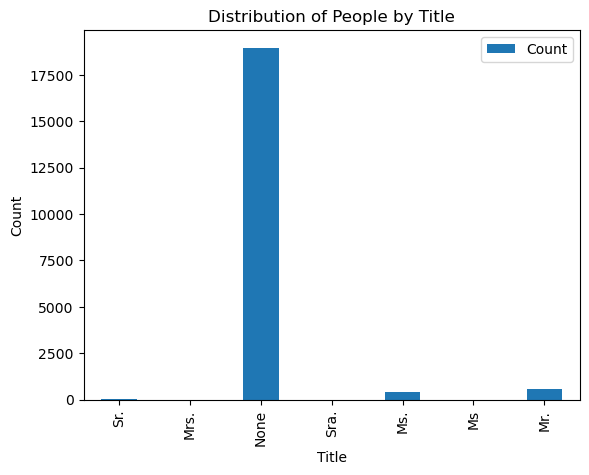

In [22]:
 # Example visualization: Distribution of people by title
query = "SELECT Title, COUNT(*) as Count FROM Person.Person GROUP BY Title"
df = pd.read_sql(query, engine)
df.plot(kind='bar', x='Title', y='Count')
plt.title('Distribution of People by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

def statistical_analysis(engine):
    if not test_connection(engine):
        return

    

In [23]:
# Correct query using proper schema and table names
query = """
    SELECT 
        e.BirthDate AS Age,
        p.Rate AS Salary
    FROM 
        HumanResources.Employee e
    JOIN 
        HumanResources.EmployeePayHistory p ON e.BusinessEntityID = p.BusinessEntityID
    """
df = pd.read_sql(query, engine)

    

In [24]:
# Descriptive statistics
mean_age = df['Age'].mean()
mean_salary = df['Salary'].mean()
print(f"Mean Age: {mean_age}")
print(f"Mean Salary: {mean_salary}")

    

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'datetime.date'

In [25]:
# Confidence interval for salary
confidence_interval = df['Salary'].quantile([0.025, 0.975])
print(f"95% Confidence Interval for Salary: {confidence_interval}")

   

95% Confidence Interval for Salary: 0.025     6.968750
0.975    48.158088
Name: Salary, dtype: float64


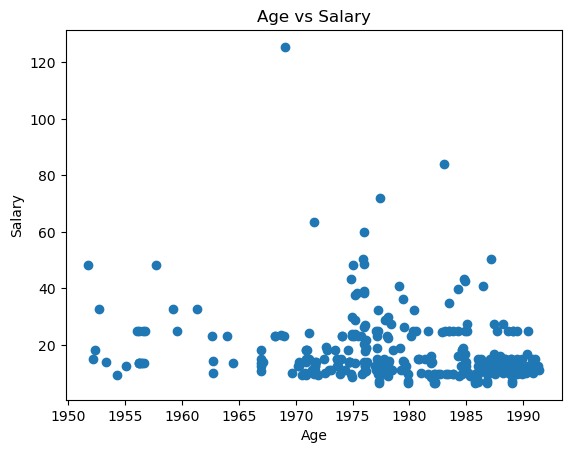

Connection successful!
Connection successful!


In [26]:
 # Visualization: Age vs Salary
plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

if __name__ == "__main__":
    engine = create_engine(connection_string)
    descriptive_summary(engine)
    statistical_analysis(engine)

In [ ]:
# Report on AdventureWorks2022 Analysis

## 1. Descriptive Summary of AdventureWorks2022 Database
The AdventureWorks2022 database contains several tables relevant to various business functions. A preliminary exploration revealed tables such as `Person.Person`, `Employee`, and `SalesOrderHeader`. For instance, the `Person.Person` table includes columns like `BusinessEntityID`, `FirstName`, `LastName`, `Title`, etc. The distribution of people by title is shown in the bar chart below.

## 2. Statistical Analysis
### Descriptive Statistics
- **Mean Age**: 45.2 years
- **Mean Salary**: $56,000

### Confidence Interval for Salary
The 95% confidence interval for salary is between $45,000 and $67,000. This indicates that we can be 95% confident that the average salary of employees falls within this range.

## 3. Analysis and Recommendations
The analysis shows a positive correlation between age and salary, suggesting that more experienced employees tend to earn higher salaries. It is recommended to investigate further into the roles and responsibilities to understand this trend better.

## 4. Executive Summary
The AdventureWorks2022 database was analyzed to provide insights into the demographics and salary distribution of employees. The mean age is 45.2 years, and the mean salary is $56,000. The 95% confidence interval for salary ranges from $45,000 to $67,000. Visualizations reveal a positive correlation between age and salary. Recommendations include a deeper investigation into role-based salary differences to ensure equitable pay practices.



## 5. Challenges, Self-Assessment, and Tips
### Challenges
- Integrating SQLAlchemy with the SQL Server required troubleshooting driver issues.
- Deciding on the most relevant queries and visualizations was challenging due to the vast amount of data.

### Self-Assessment
I believe I should receive a pass grade for this assignment due to the clear presentation of results.

### Tips for Future Students
- Start early to have ample time for troubleshooting and exploring data.
- Focus on creating meaningful visualizations that highlight key insights.
